In [75]:
# Load intial Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as ans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# read the csv file 
admission_df = pd.read_csv("./Admission_Predict.csv")

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
df_university = admission_df.groupby("University Rating").mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### BASIC DATA VISUALIZATION

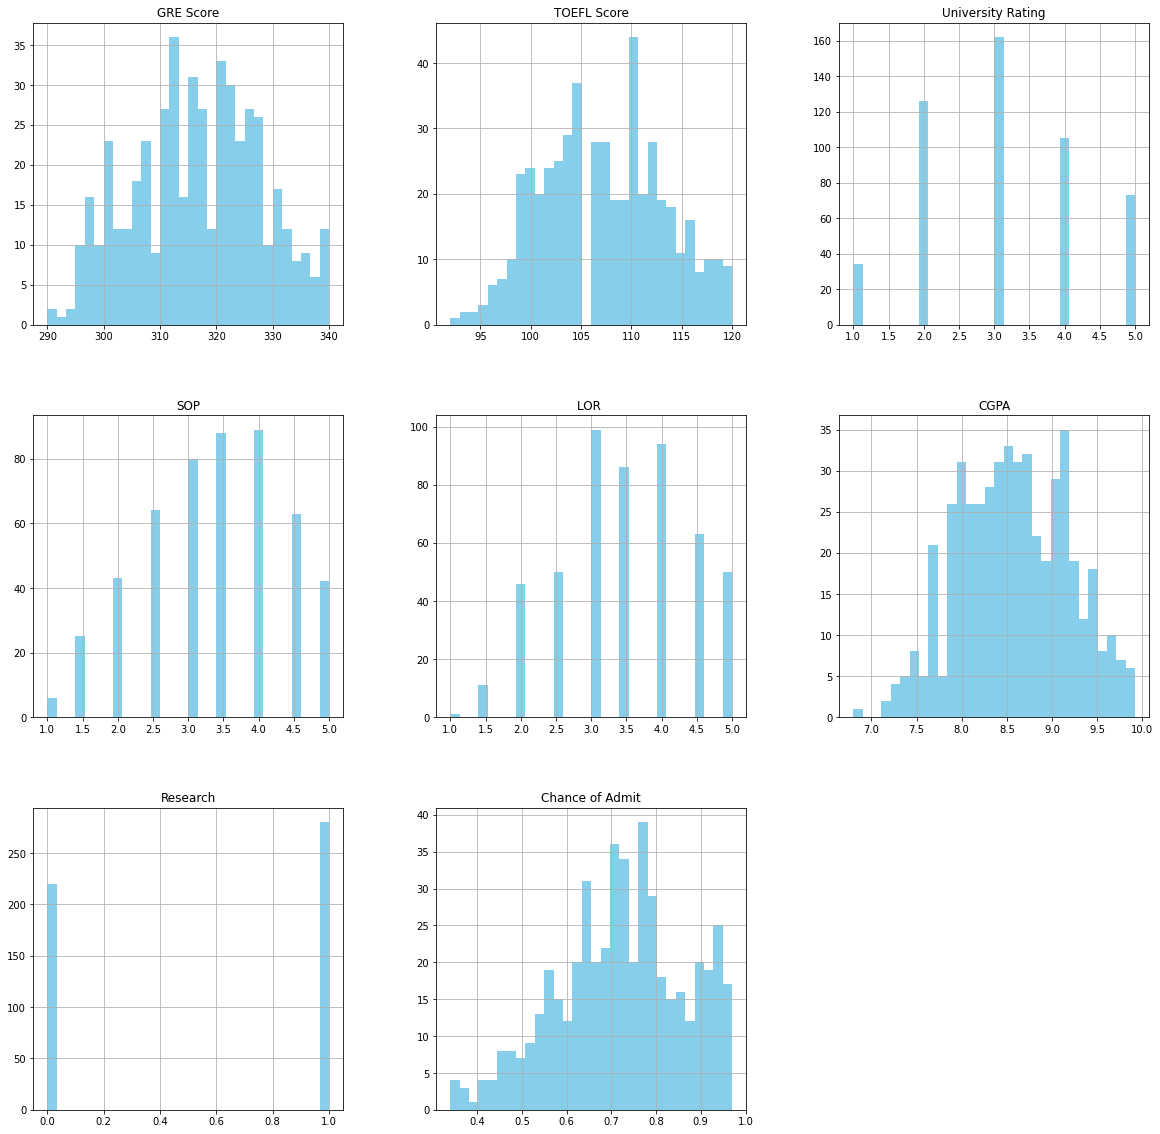

In [14]:
admission_df.hist(bins = 30, figsize=(20,20), color= 'skyblue');

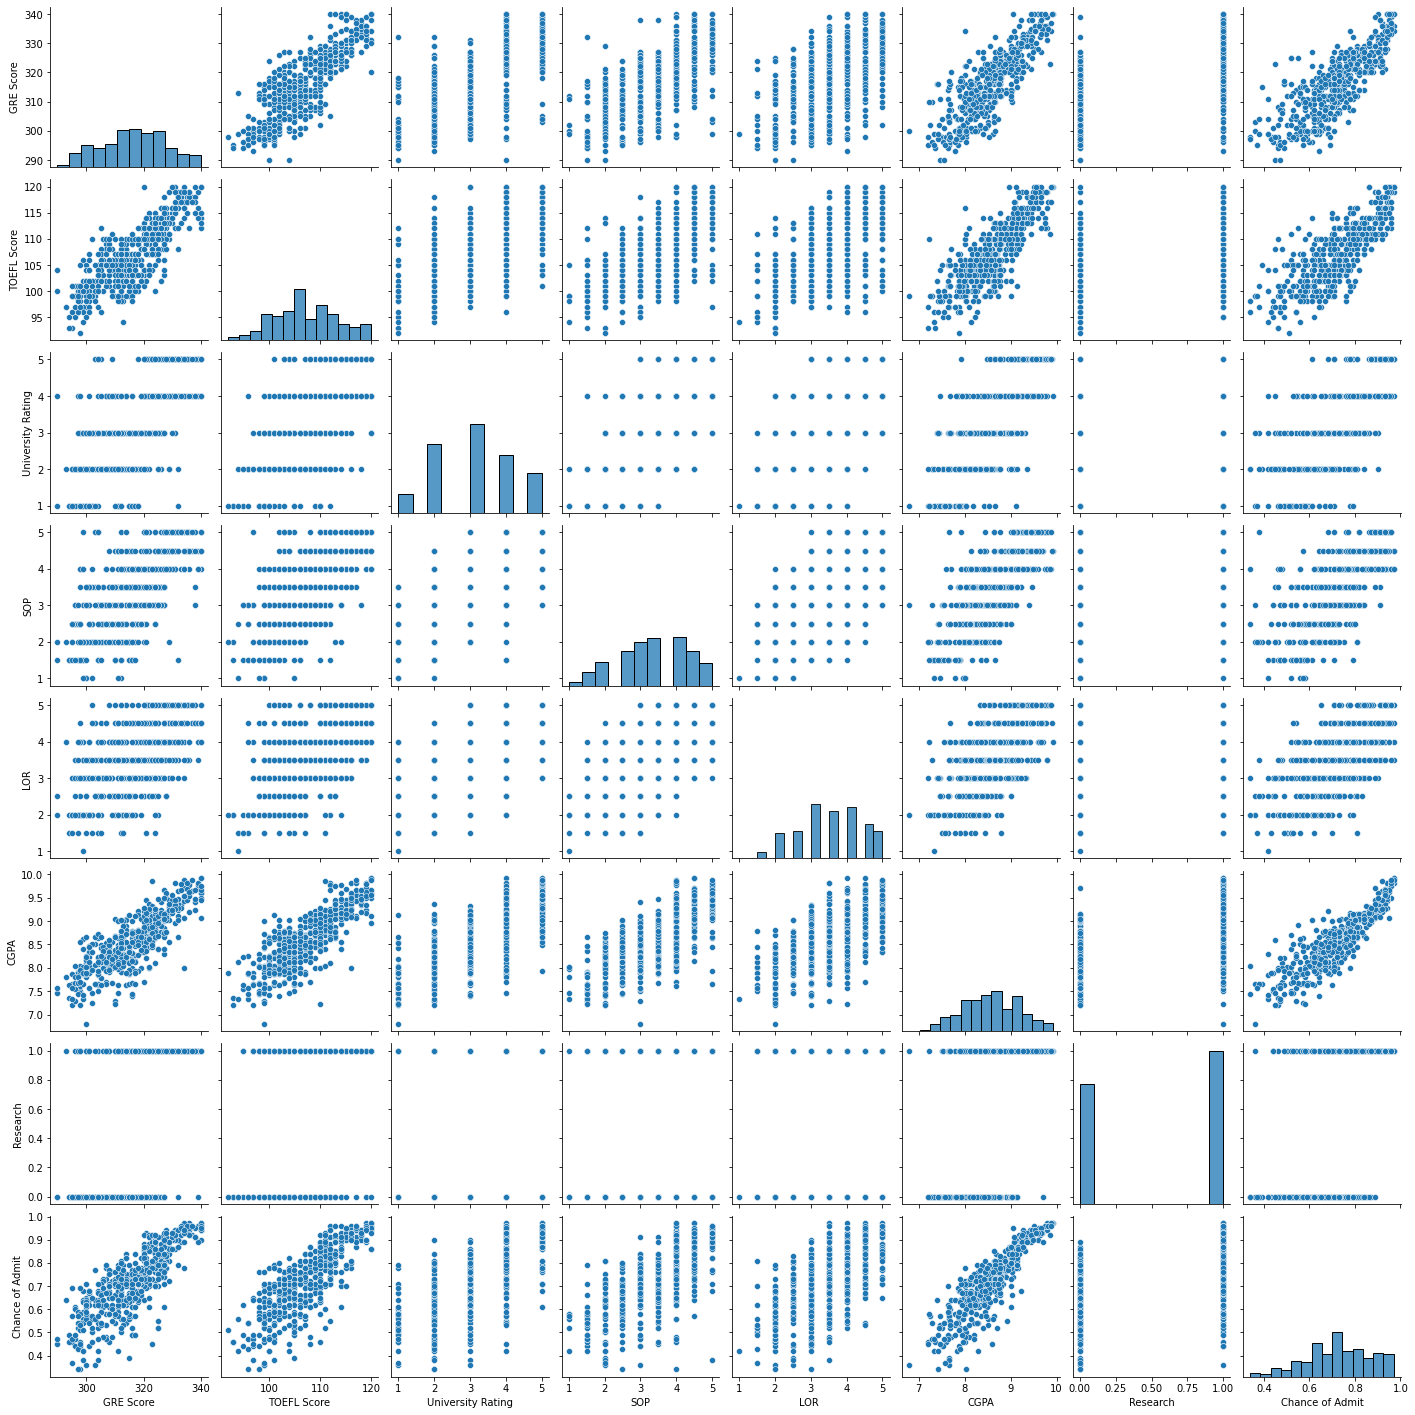

In [17]:
sns.pairplot(admission_df);

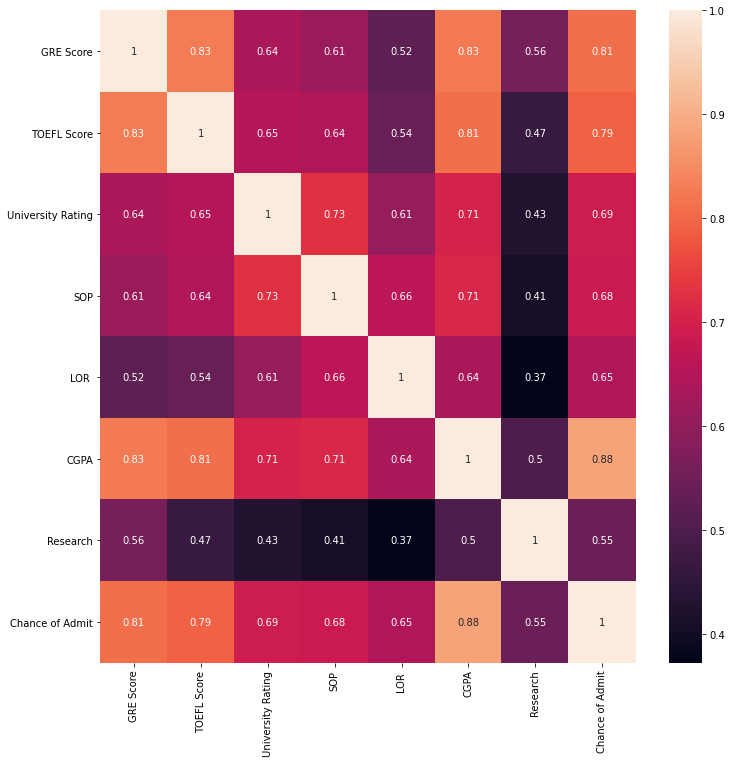

In [18]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### CREATE TRAINING AND TESTING DATASET

In [19]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [21]:
X = admission_df.drop('Chance of Admit', axis=1)

In [23]:
y = admission_df["Chance of Admit"]

In [27]:
X.shape

(500, 7)

In [28]:
y.shape

(500,)

In [29]:
X  = np.array(X)
y = np.array(y)

In [30]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [33]:
# scaling the data before training the model
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [35]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [38]:
# spliting the data in to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### FITTING A LINEAR REGRESSION MODEL

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [47]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [48]:
acuracy_linreg = linreg_model.score(X_test, y_test)

In [52]:
print(f"Accuracy is {acuracy_linreg*100}%")

Accuracy is 81.69538337008487%


### TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [53]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [54]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [55]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
16/16 [==============================] - 2s 37ms/step - loss: 0.7777 - val_loss: 0.1868
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3468 - val_loss: 0.1396
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 0.3423 - val_loss: 0.1166
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3843 - val_loss: 0.1290
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3180 - val_loss: 0.1170
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2690 - val_loss: 0.1141
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2774 - val_loss: 0.1096
Epoch 8/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2331 - val_loss: 0.1025
Epoch 9/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2532 - val_loss: 0.1118
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2509 - val_loss: 0.1220
Epoc

16/16 [==============================] - 0s 10ms/step - loss: 0.1467 - val_loss: 0.1417
Epoch 83/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1209 - val_loss: 0.1652
Epoch 84/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1540 - val_loss: 0.1670
Epoch 85/100
16/16 [==============================] - 0s 11ms/step - loss: 0.1457 - val_loss: 0.1430
Epoch 86/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1759 - val_loss: 0.1379
Epoch 87/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1431 - val_loss: 0.1391
Epoch 88/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1437 - val_loss: 0.1493
Epoch 89/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1557 - val_loss: 0.1577
Epoch 90/100
16/16 [==============================] - 0s 11ms/step - loss: 0.1309 - val_loss: 0.1592
Epoch 91/100
16/16 [==============================] - 0s 14ms/step - loss: 0.1609 - val_loss: 0.1501
Epoc

In [56]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

4/4 [==============================] - 0s 7ms/step - loss: 0.2175
Accuracy : 0.7824910879135132


In [57]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

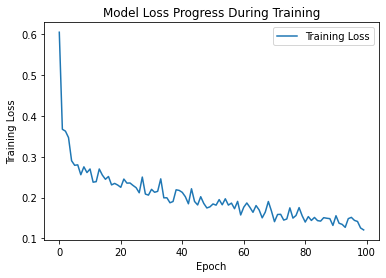

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

### DECISION TREE AND RANDOM FOREST MODELS

In [59]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor

DTree_model = DecisionTreeRegressor()
DTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
accuracy_dtree = DTree_model.score(X_test, y_test)
print(f"Accuracy is {accuracy_dtree*100}%")

Accuracy is 59.011453377618885%


In [62]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
Random_F_model= RandomForestRegressor(n_estimators=100,  max_depth=10)
Random_F_model.fit(X_train, y_train)

<ipython-input-62-2eb79c1bb128>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_F_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [63]:
accuracy_rforest = Random_F_model.score(X_test, y_test)
print(f"Accuracy is {accuracy_rforest*100}%")

Accuracy is 77.10665010225284%


### REGRESSION MODEL KPIs

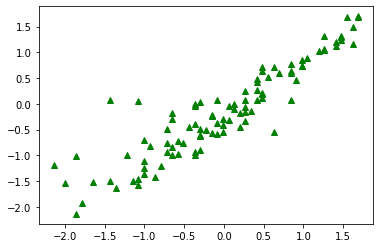

In [67]:
y_predict = linreg_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color="green");

In [68]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

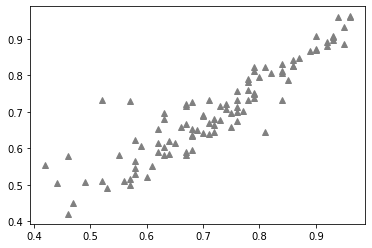

In [72]:
plt.plot(y_test_orig, y_predict_orig, "^", color="grey");

In [73]:
k = X_test.shape[1]
n = len(X_test)
n

100

In [74]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.056 
MSE = 0.0031738356469993233 
MAE = 0.04360135785171537 
R2 = 0.8169538337008486 
Adjusted R2 = 0.803026408004174
